In [43]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [44]:
data_dir = "../data/processed/processed/"

In [45]:
################### Load in data
# Start with the lens positions/diopters
with open(f'{data_dir}/lens_positions.pickle', 'rb') as handle:
    lens_positions = pickle.load(handle)

with open(f'{data_dir}/api_positions.pickle', 'rb') as handle:
    api_positions = pickle.load(handle)
    print("API positions:", api_positions)

lens_positions = np.array(lens_positions)
print("Lens positions in diopter (1/m):", lens_positions-lens_positions[8])

# Second, the patterns
with open(f'{data_dir}/train_patterns.pickle', 'rb') as handle:
    patterns = pickle.load(handle)
    patterns = [str(pat).split('-')[-1] for pat in patterns]
    print("Data Patterns:", patterns)

API positions: [0.    0.057 0.114 0.171 0.229 0.286 0.343 0.4   0.457 0.514 0.571 0.629
 0.686 0.743 0.8  ]
Lens positions in diopter (1/m): [ 0.46983076  0.43178002  0.39651886  0.36375135  0.33270501  0.30243718
  0.18889263  0.08970871  0.         -0.08444508 -0.13811967 -0.26232538
 -0.36024    -0.45552537 -0.48532019]
Data Patterns: ['10', '20', '50', '70']


In [46]:
# Third, our blurry and sharp data
blurry_np = np.load(f'{data_dir}/blurry-original.npy')
sharp_np  = np.load(f'{data_dir}/sharp.npy')

In [47]:
sub_blurry = []
blurry_np.shape

(8, 15, 3024, 4032)

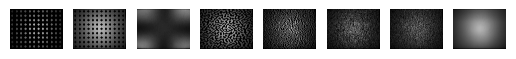

In [48]:
fig, ax = plt.subplots(1, 8)
for i in range(8):
    ax[i].imshow(blurry_np[i,12, ...], cmap='gray')
    ax[i].axis('off')

In [49]:
dots = blurry_np[0,...]
dots_conjugate = blurry_np[1,...]
black_capture = blurry_np[2,...]
white_capture = blurry_np[7,...]
sample_pattern = blurry_np[3,...]

In [50]:
# Do the same for the calibration patterns
calib_dir = "../data/processed/iphone/calib_patterns/"


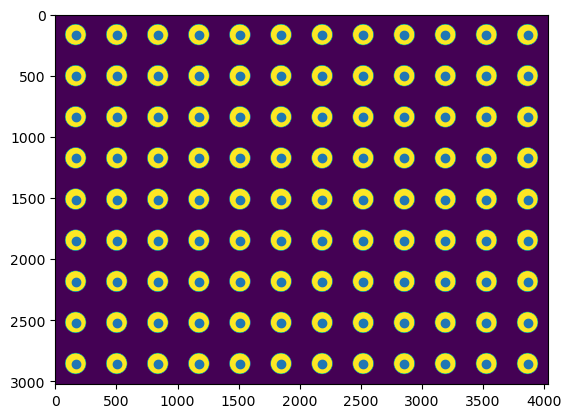

In [51]:
dot_pattern = np.load(f'{calib_dir}9.npy')
centres_h = np.load(f'{calib_dir}9-centres-h.npy')
centres_w = np.load(f'{calib_dir}9-centres-w.npy')
plt.imshow(dot_pattern)
plt.scatter(centres_w, centres_h)

In [52]:


# Save these arrays to an NPZ file, assigning keywords
np.savez(
    f'../data/unprocessed-iphone12prowide.npz', 
    dots=dots,
    dots_conjugate=dots_conjugate,
    black_capture=black_capture,
    white_capture=white_capture,
    dot_pattern=dot_pattern,
    centres_h=centres_h,
    centres_w=centres_w,
    api_positions=api_positions,
    lens_positions=lens_positions,
    patterns=np.array(patterns, dtype=str),
    infocus_index=12,
)